# GMS Intro to Stats
## Excercise 2: Dimension reduction methods.
### Plotting a map of Europe given distances between cities
+ Distance file available from RMDS project:
    - [https://github.com/cheind/rmds/blob/master/examples/european_city_distances.csv](https://github.com/cheind/rmds/blob/master/examples/european_city_distances.csv)

In [1]:
import pandas as pd
import numpy as np
from sklearn import manifold
import matplotlib.pyplot as plt
from adjustText import adjust_text
import seaborn as sns
sns.set()

In [2]:
# Get the data
dists = pd.read_csv("european_city_distances.csv", delimiter=';', index_col=0)
dists

,Barcelona,Belgrade,Berlin,Brussels,Bucharest,Budapest,Copenhagen,Dublin,Hamburg,Istanbul,...,Moscow,Munich,Paris,Prague,Rome,SaintPetersburg,Sofia,Stockholm,Vienna,Warsaw
Barcelona,0.00,1528.13,1497.61,1062.89,1968.42,1498.79,1757.54,1469.29,1471.78,2230.42,...,3006.93,1054.55,831.59,1353.90,856.69,2813.02,1745.55,2276.51,1347.43,1862.33
Belgrade,1528.13,0.00,999.25,1372.59,447.34,316.41,1327.24,2145.39,1229.93,809.48,...,1710.99,773.33,1445.70,738.10,721.55,1797.75,329.46,1620.96,489.28,826.66
Berlin,1497.61,999.25,0.00,651.62,1293.40,689.06,354.03,1315.16,254.51,1735.01,...,1607.99,501.97,876.96,280.34,1181.67,1319.62,1318.67,810.38,523.61,516.06
Brussels,1062.89,1372.59,651.62,0.00,1769.69,1131.52,766.67,773.20,489.76,2178.85,...,2253.26,601.87,261.29,721.08,1171.34,1903.66,1697.83,1280.88,914.81,1159.85
Bucharest,1968.42,447.34,1293.40,1769.69,0.00,639.77,1571.54,2534.72,1544.17,445.62,...,1497.56,1186.37,1869.95,1076.82,1137.38,1740.39,296.68,1742.25,855.32,946.12
Budapest,1498.79,316.41,689.06,1131.52,639.77,0.00,1011.31,1894.95,927.92,1064.76,...,1565.19,563.93,1247.61,443.26,811.11,1556.51,629.63,1316.59,216.98,545.29
Copenhagen,1757.54,1327.24,354.03,766.67,1571.54,1011.31,0.00,1238.38,287.97,2017.17,...,1558.52,838.00,1025.90,633.05,1529.69,1143.40,1635.54,521.68,868.87,667.80
Dublin,1469.29,2145.39,1315.16,773.20,2534.72,1894.95,1238.38,0.00,1073.36,2950.11,...,2792.41,1374.91,776.83,1465.61,1882.22,2314.19,2471.02,1626.56,1680.00,1823.72
Hamburg,1471.78,1229.93,254.51,489.76,1544.17,927.92,287.97,1073.36,0.00,1983.75,...,1779.93,610.17,744.63,492.25,1307.51,1414.16,1554.82,809.65,742.79,750.49
Istanbul,2230.42,809.48,1735.01,2178.85,445.62,1064.76,2017.17,2950.11,1983.75,0.00,...,1753.97,1582.16,2253.98,1507.55,1373.81,2099.29,502.61,2171.65,1273.88,1386.08


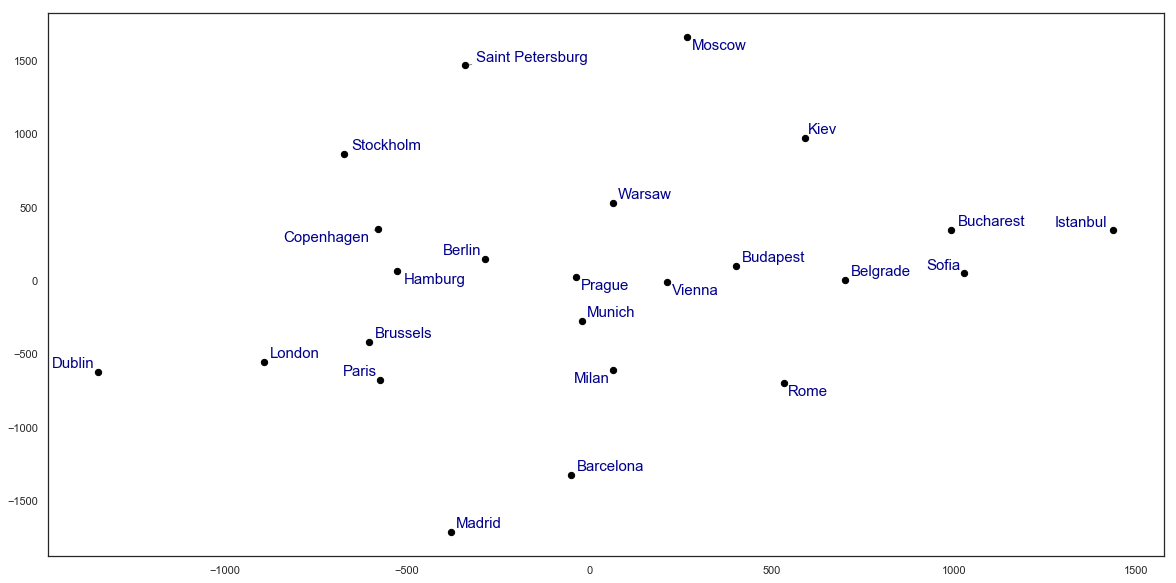

In [3]:
# Get the data in a easy to use matrix and labels
adist = np.array(dists)
cities = dists.index.values

# Caculate the coordinates in a 2D map
mds = manifold.MDS(n_components=2, dissimilarity="precomputed", random_state=6) # In 2D, with distances already precomputed and fixed orientation
results = mds.fit(adist)

coords = results.embedding_

# Plot a 2D map of baed on the distances from each other.
with sns.axes_style("white"):
    plt.figure(1,figsize=(20,10))
    plt.scatter(coords[:, 0], coords[:, 1], marker = 'o', color='black', s=40)
    texts = []
    for label, x, y in zip(cities, coords[:, 0], coords[:, 1]):
        texts.append(plt.text(x,y,label,size=15,color='darkblue'))
    adjust_text(texts, arrowprops=dict(arrowstyle="-", color='k', lw=0.5))
    plt.show()

### How about using genetic distances to map ethnicity

+ Firstly find genome positiions in your cohort that are informative about race:
    - Use the 1000 genome dataset to pick out positions with a minor allele frequency different between two of African, Asian or European populations (filtering out any multi allelic sites).
+ For these sites, calculate the Euclidean distance between your samples:
    - To calculate the distance at each position, for a pair of samples, if they are both share the same alleles, distance = 0; or share one allele, distance = 1; and if they share no alleles, distance = 2.
    - Square each the distance at each position, add them all together and take the square root of the answer.
    - This is used to plot a 2D map of genomic 'distance' between the samples. We can compare the reported ethnicity to the position on the map.

In [4]:
# Get the data in
genetic_distances = np.genfromtxt('genetic_distances.csv', delimiter=',')
recorded_ethnicities = open('recorded_ethnicities.txt').read().splitlines()

# Define the markers and colours for each recorded ethnicity
ethnicities = {
'Australia': ['Australian', 'd', 'blue'], 
'Germany': ['German', 's', 'blue'], 
'Poland': ['Poland', '1', 'blue'], 
'Russia': ['Russia', 'p', 'blue'], 
'Ukraine': ['Ukraine', '3', 'blue'], 
'Yemen': ['Yemen', '4', 'red'], 
'Korea South': ['S_Korea', 'D', 'red'], 
'Singapore': ['Singapore', '|', 'red'], 
'Vietnam': ['Vietnam', '>', 'red'], 
'Canada_Wh': ['White_Canadian', '^', 'blue'], 'Canada_As': ['Asian_Canadian', '^', 'red'],  'Canada_NK': ['Unknown_Canadian', '^', 'black'], 
'USA_Af': ['African_American','o','green'], 'USA_As': ['Asian_American','o','red'], 'USA_Wh': ['White_American','o','blue'], 'USA_La': ['Latin_American','o','gold'], 'USA_NK': ['Unknown_American', 'o', 'black'], 
'Unknown_Af': ['African_Unknown','x','green'], 'Unknown_As': ['Asian_Unknown','x','red'], 'Unknown_Wh': ['White_Unknown','x','blue'], 'Unknown_La': ['Latin_Unknown','x','gold'], 'Unknown_PI': ['Pacific_Islander_Unknown','x','purple'], 'Unknown_NK': ['Unknown_Unknown', 'x', 'black']}

# OK Calculation time
mds = manifold.MDS(n_components=2, dissimilarity="precomputed", random_state=6)
results = mds.fit(genetic_distances)

coords = results.embedding_

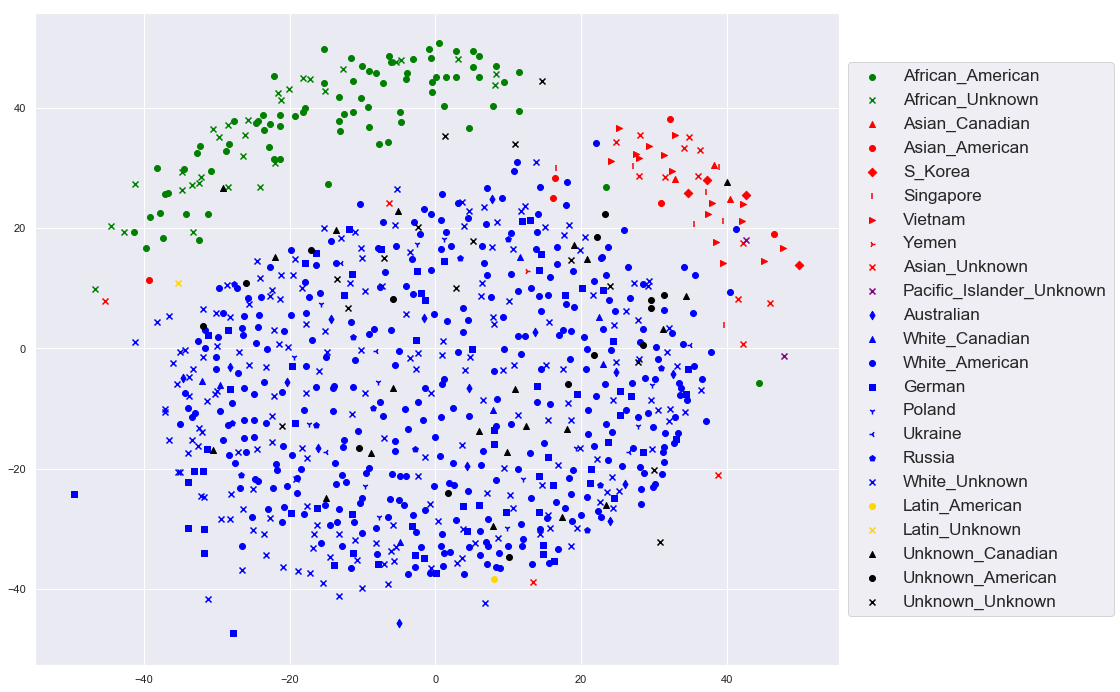

In [5]:
# Get the order to plot it in
nationalities = []
for item in ethnicities:
    nationalities.append(item)

plotting_dict = {}
for item in nationalities:
    plotting_dict[item] = []

for k,item in enumerate(recorded_ethnicities):
    plotting_dict[item].append(k)

correct_order = []
for key in plotting_dict:
    correct_order.append(key)
correct_order = list(set(correct_order))
correct_order
# correct_order.sort()

# Plot a 2D map of genetic distances
with sns.axes_style("darkgrid"):
    fig = plt.figure(1,figsize=(18, 12))
    ax = plt.subplot(111)
    
    correct_order = ['USA_Af', 'Unknown_Af', 'Canada_As', 'USA_As', 'Korea South', 'Singapore', 'Vietnam', 'Yemen', 'Unknown_As', 'Unknown_PI', 'Australia', 'Canada_Wh', 'USA_Wh', 'Germany', 'Poland', 'Ukraine', 'Russia', 'Unknown_Wh', 'USA_La', 'Unknown_La', 'Canada_NK', 'USA_NK', 'Unknown_NK']
    
    for key in correct_order:
        if key in ethnicities:
             plt.scatter(coords[plotting_dict[key], 0], coords[plotting_dict[key], 1], c=ethnicities[key][2], marker=ethnicities[key][1],label=ethnicities[key][0])
    
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * .8, box.height])
    ax.legend(loc = 'center left', fontsize='xx-large',bbox_to_anchor=(1, .5))